In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('_sources/TSA_COURSE_NOTEBOOKS/Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 348 entries, 1990-01-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
Employees    348 non-null float64
dtypes: float64(1)
memory usage: 5.4 KB


In [5]:
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


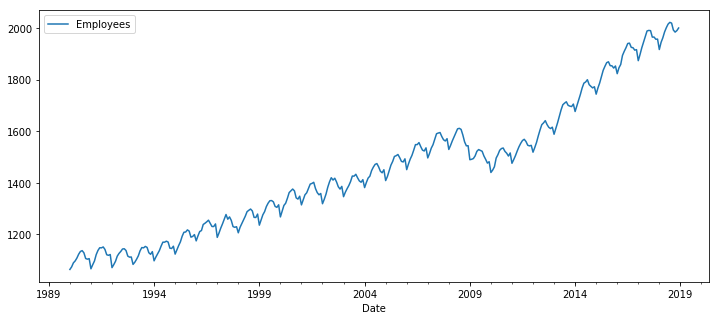

In [8]:
df.plot(figsize=(12,5))

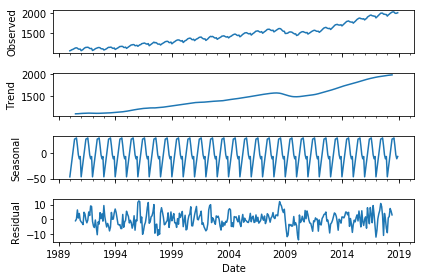

In [11]:
seasonal_decompose(df['Employees'],model='add').plot();

In [14]:
auto_arima(df['Employees'],start_p=1,start_q=1,m=12,seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1134.664
Date:                            Wed, 24 Jul 2019   AIC                           2277.328
Time:                                    07:33:15   BIC                           2292.726
Sample:                                         0   HQIC                          2283.459
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0477      0.292     -0.163      0.870      -0.620       0.524
ar.S.L12       0.5291      0.040     13.286      0.000       0.451       0.607
ar.S.L24       0.4303      0.041     10.453      0.000       0.350       0.511
sigma2        37.2952      2.157     17.294      0.000      33.068      41.522
===================================================================================
Ljung-Box (Q):                       99.53   Jarque-Bera (JB):                51.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.29
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
nobs=12

In [33]:
train, test = df[:-nobs],df[-nobs:]

In [34]:
len(test)

12

In [35]:
model = SARIMAX(train['Employees'],order=(0, 1, 0),seasonal_order=(2, 0, 0, 12))

In [36]:
results = model.fit()

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 24 Jul 2019   AIC                           2196.814
Time:                                    07:42:20   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (Q):                      102.80   Jarque-Bera (JB):                56.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
preds = results.predict(len(train),len(train)+len(test)-1,typ='levels').rename("SARIMA preds")

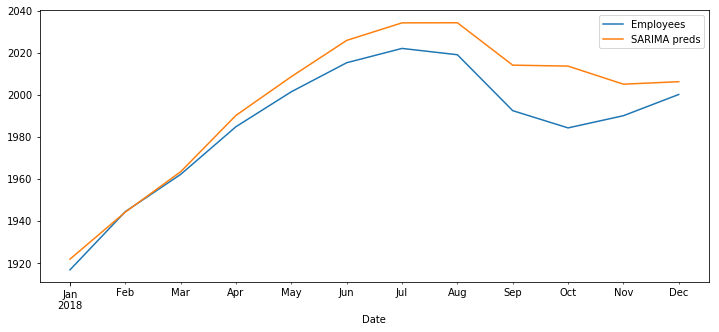

In [46]:
test.plot(legend=True)
preds.plot(figsize=(12,5),legend=True)

In [50]:
print(rmse(test['Employees'],preds))
print(mean_squared_error(test['Employees'],preds))

13.522228482100981
182.85066312214303


In [51]:
test['Employees'].mean()

1986.125

In [52]:
model = SARIMAX(df['Employees'],order=(0, 1, 0),seasonal_order=(2, 0, 0, 12))
results = model.fit()

In [60]:
forecast = results.predict(len(df)-1,len(df)+12,typ='levels').rename('SARIMA forecast')

In [61]:
nobs

12

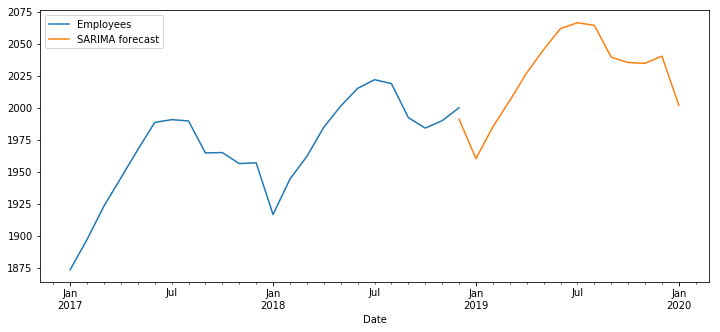

In [62]:
df.iloc[-nobs-nobs:]['Employees'].plot(legend=True,figsize=(12,5))
forecast.plot(legend=True)